<a id='Q0'></a>
<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1McNxpNrSwfqu1w-QtlOmPSmfULvkkMQV" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

<center> <h1> Exercise: Clustering (FIFA data set) </h1> </center>
<p style="margin-bottom:1cm;"></p>

<center>Propulsion Academy, 2020</center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm">
        <p><strong>FIFA Dataset:</strong> The data set was scraped from <a style="color:#00BAE5" href="https://sofifa.com/"> this website </a>. For non-football enthusiasts, you can check out Wiki website for more clarification about football player's positions. <a style="color:#00BAE5" href="https://en.wikipedia.org/wiki/Association_football_positions"> Find type and meaning of positions here.</a></p>
        <p><strong>Challenge Description:</strong> Let’s take what you’ve learned over the past week and put it into practice. The dataset we will be using contains two CSV files ‘features’ and ‘target’. Each row in the ‘features’ belongs to a ‘measurement’ and each column represents a ‘feature’. For each row in the ‘features’ you have a corresponding class label in ‘target’. You can consider the row-numbers as keys. You will have to use data labelled as ‘train’ for implementing the models. You have to submit the results that you obtain from the predictions of your Machine Learning models from the data labelled as ‘test’.</p>
        <p><strong>Exercise question and tasks:</strong></p>
        <ol>
            <li> Clean the data set named as <b>'PlayerAttributeData.csv'</b> with the applicable techniques you have learned so far.</li>
        <li> Explore the data set by creating a correlation heatmap, histograms and a boxplot of all features.</li>
        <li> Use K-means for creating clusters.</li>
        <li> Use both, the visuals from before and statistical methods (elbow and silhouette method), to select the ‘optimal’ number of clusters</li>
            <li> Use the <b>'PlayerPlayingPositionData.csv'</b> data to associate each player’s preferred position. How does this correspond to the clusters that you have obtained by unsupervised learning? Come up with suitable visuals to compare the clusters with the actual preferred positions.</li>
        </ol>
        <p><strong>Hints:</strong> Some cells contain expressions such as <b>6+1</b> which can’t be converted by pandas into numerical values. The pandas method  <b>applymap</b> and the <b>eval</b> function from Python might be useful for solving this issue.</p>
        <p><strong> Direct links:</strong></p>
        <a id='P0'></a>
        <ol>
            <li> <a style="color:#1202020" href='#P1'>Notebook Set-Up</a></li>
            <li> <a style="color:#1202020" href='#P2'>Data</a> (Loading; Exploration; Pre-processing)</li>
            <li> <a style="color:#1202020" href='#P3'>Visualization of the data</a> (Correlation Heatmap, Histograms, Boxplot)</li>
            <li> <a style="color:#1202020" href='#P4'>Application of Clustering techniques</a></li>
            <li> <a style="color:#1202020" href='#P5'>Sankey Diagram </a></li>
            <li> <a style="color:#1202020" href='#P6'>Wrap-Up </a></li>
        </ol>
        <strong>Topics Trained:</strong> Unsupervised Learning, Feature correlations, Clustering and Outliers detection methods, Visualizations, Pipelines and Model Selection.
    </div>
</div>

<nav style="text-align:right"><strong>
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/04_MachineLearning/index.html" title="momentum"> Module 4, Machine Learning </a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/04_MachineLearning/day7/index.html" title="momentum">Day 7 - Clustering and Outlier Detection </a>|
        <a style="color:#00BAE5" href="https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/04_MachineLearning/day7/pages/11_exercises.html" title="momentum"> Exercises for today </a>
</strong></nav>

-------

<a style="color:#00BAE5" href='#P0'><div style="text-align:right;"> Back to Table of Contents </div></a>
<a id='P1'></a>
<h2 style="color:#EF475B">  Notebook Set-Up </h2>

Here you will find the libraries and functions that were used within this notebook.

### Magics

In [1]:
# auto reload packages and modules when they are modified
%load_ext autoreload
%autoreload 2
# %load_ext lab_black

### Modules and Libraries

In [2]:
# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

### Necessary Functions for this Notebook

In [3]:
# DESCRIPTION --> # it plots the distributions of your data
def plot_distrib(df, ncols, nrows, figsize):
    vars_ = df.columns
    c = 0
    plt.figure(figsize=figsize)
    for v in vars_:
        ax = plt.subplot(nrows, ncols, c + 1)
        _, nbins, _ = plt.hist(df[v], 20, color="g", alpha=0.6, label=v)
        plt.xlabel(v)
        plt.legend(loc="best")
        c = c + 1
    plt.show()
    
# How to call this function? --> plot_distrib (target_df, number_of_cols, number_of_rows, figsize)

### Visualizations set-up

In [4]:
plt.style.use("dark_background")
plt.rcParams.update({"font.size": 18, "figure.figsize": (18, 10)})

--------------

<a style="color:#00BAE5" href='#P0'><div style="text-align:right;"> Back to Table of Contents </div></a>
<a id='P2'></a>
<h2 style="color:#EF475B">  Data --> Loading; Exploration; Pre-proccessing </h2>

### **Data:** Loading

In [5]:
# Data Loading:

url_1 = '../../data/fifa-18-demo-player-dataset/PlayerAttributeData.csv'
attr = pd.read_csv(url_1, dtype=str, index_col=0)  

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        we will load the df as str type to use the <b>eval</b> function later on (based on the hint provided in the exercise statement)
    </div>
</div>

### **Data:** Exploration

In [6]:
# Data frame size:

attr.shape

(17981, 35)

In [7]:
# Data frame initial aspect:

attr.head()

Acceleration Aggression Agility Balance Ball control Composure Crossing  \
0           89         63      89      63           93        95       85   
1           92         48      90      95           95        96       77   
2           94         56      96      82           95        92       75   
3           88         78      86      60           91        83       77   
4           58         29      52      35           48        70       15   

  Curve Dribbling Finishing  ... Reactions Short passing Shot power  \
0    81        91        94  ...        96            83         94   
1    89        97        95  ...        95            88         85   
2    81        96        89  ...        88            81         80   
3    86        86        94  ...        93            83         87   
4    14        30        13  ...        85            55         25   

  Sliding tackle Sprint speed Stamina Standing tackle Strength Vision Volleys  
0             23           91      92              31       80     85      88  
1             26           87      73              28       59     90      85  
2             33           90      78              24       53     80      83  
3             38           77      89              45       80     84      88  
4             11           61      44              10       83     70      11  

[5 rows x 35 columns]

<div style="background:#EEEDF5;border:0.1cm solid #EF475B">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#EF475B">Warning:</b> 
        We have to rename some columns in order to remove remove spaces contained within their names and also we need to convert letters to lower cases.
    </div>
</div>

In [8]:
# Replacing blank spaces by another character 

attr.columns = attr.columns.str.lower().str.replace(" ", "_")
attr.columns

Index(['acceleration', 'aggression', 'agility', 'balance', 'ball_control',
       'composure', 'crossing', 'curve', 'dribbling', 'finishing',
       'free_kick_accuracy', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'heading_accuracy', 'id',
       'interceptions', 'jumping', 'long_passing', 'long_shots', 'marking',
       'penalties', 'positioning', 'reactions', 'short_passing', 'shot_power',
       'sliding_tackle', 'sprint_speed', 'stamina', 'standing_tackle',
       'strength', 'vision', 'volleys'],
      dtype='object')

In [9]:
# Checking our colum values data types (str, int, float, bool):

print('\nDo we have **strings** inside of our df?:\t', (attr.dtypes == "object").any(), '\n')
print('\nDo we have **integers** inside of our df?:\t', (attr.dtypes == "int").any(), '\n')
print('\nDo we have **floats** inside of our df?:\t', (attr.dtypes == "float64").any(), '\n')
print('\nDo we have **boolean** inside of our df?:\t', (attr.dtypes == "bool").any(), '\n')


Do we have **strings** inside of our df?:	 True 


Do we have **integers** inside of our df?:	 False 


Do we have **floats** inside of our df?:	 False 


Do we have **boolean** inside of our df?:	 False 



In [10]:
# Checking if any id is duplicated along the df:

check_duplicated_ids = (attr["id"].value_counts() > 1).any()
size_of_duplicated_ids = (attr["id"].value_counts() > 1).sum()
print("Do we have duplicated id's within our df?: ", check_duplicated_ids)
print('\nHow many then?:\t', size_of_duplicated_ids if check_duplicated_ids==True else "None")

Do we have duplicated id's within our df?:  True

How many then?:	 52


In [11]:
print('\nInitial Shape before removing duplicates:\t', attr.shape)
attr = attr.drop_duplicates()
print('\nFinal Shape before removing duplicates:\t', attr.shape, '\n')
attr.info()


Initial Shape before removing duplicates:	 (17981, 35)

Final Shape before removing duplicates:	 (17929, 35) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17929 entries, 0 to 17980
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   acceleration        17929 non-null  object
 1   aggression          17929 non-null  object
 2   agility             17929 non-null  object
 3   balance             17929 non-null  object
 4   ball_control        17929 non-null  object
 5   composure           17929 non-null  object
 6   crossing            17929 non-null  object
 7   curve               17929 non-null  object
 8   dribbling           17929 non-null  object
 9   finishing           17929 non-null  object
 10  free_kick_accuracy  17929 non-null  object
 11  gk_diving           17929 non-null  object
 12  gk_handling         17929 non-null  object
 13  gk_kicking          17929 non-null  object
 14  gk_pos

<div style="background:#EEEDF5;border:0.1cm solid #EF475B">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#EF475B">Warning:</b> 
        If we look into the column <b>acceleration</b> we will see that there are some values that contain special characters within them. We must handle them properly
    </div>
</div>

<div style="background:#EEEDF5;"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    <li>Let's check first the amount of unique values in chosen feature named as: <b>acceleration</b></li>
</div>

In [12]:
print(attr["acceleration"].unique())

['89' '92' '94' '88' '58' '79' '57' '93' '60' '78' '75' '76' '46' '90'
 '68' '49' '43' '87' '77' '95' '62' '72' '65' '70' '63' '82' '69' '67'
 '54' '55' '74' '86' '84' '48' '80' '71' '85' '40' '51' '38' '53' '73'
 '45' '61' '64' '44' '42' '81' '91' '59' '52' '66' '39' '34' '50' '83'
 '47' '96' '31' '30' '70+9' '56' '26' '80+1' '35' '36' '32' '49-1' '41'
 '67+2' '37' '28' '33' '20' '79-2' '65-2' '29' '91-2' '74-3' '75+1' '41-6'
 '74+1' '70+3' '17' '75+5' '74+2' '71+2' '68+1' '71+4' '89-2' '25' '27'
 '24' '58-10' '78+1' '86+1' '66-1' '22' '66+1' '15' '74+4' '71-3' '80+2'
 '21' '23' '64-2' '18' '57-4' '78+3' '19' '73+9' '82-3' '68+3' '68+2'
 '55-8' '55-1' '43-2' '77+3' '82+10' '16' '49-10' '72+1' '61+1' '79+8'
 '70-2' '13' '14' '60-2' '86+7' '81+4' '69+3' '65-10' '64-3' '73+4' '75-6'
 '64+5' '33+10' '92+2' '12' '76-1' '62+2' '65+7' '58+8' '44-2' '77+1'
 '82+3' '68-1' '61+3' '73+3' '59+1' '64+12' '85-1' '78+14' '11' '59-1'
 '75+4' '73+10' '71+6' '77+13' '62+1' '64-5']


In [13]:
# Counting how many data points we are gonna change:

    # all special characters --> '!@#$%^&*()[]{};:,./<>?\|`~-=_+'

sum_findings = attr['acceleration'].str.contains('\+').sum()
subtract_findings = attr['acceleration'].str.contains('\-').sum() 
print('\nTotal amount of cells with the special character "+": ', sum_findings) # printing out the sum
print('\nTotal amount of cells with the special character "-": ', subtract_findings) # printing out the sum


Total amount of cells with the special character "+":  55

Total amount of cells with the special character "-":  29


<div style="background:#EEEDF5;"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    <li>We need to remove all <b>`+`</b>  and <b>`-`</b> from this data by evaluating the cells. The fatest way to identify mathematical signs and perform calculation is by using the <b>applymap()</b> method</li>
    <li><a style="color:#00BAE5" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html"> applymap official documentation from pandas </a></li>
    <li><a style="color:#00BAE5" href="https://www.geeksforgeeks.org/python-pandas-dataframe-applymap/"> Further examples of applymap method implementation</a></li>
    <li><a style="color:#00BAE5" href="https://www.geeksforgeeks.org/difference-between-map-applymap-and-apply-methods-in-pandas/"> Post about the differences between map applymap and apply methods in pandas</a></li>
    <li><a style="color:#00BAE5" href="https://www.tutorialspoint.com/python-eval"> Explanation about the eval() method</a></li>
</div>

### **Data:** Pre-processing

In [14]:
attr = attr.applymap(eval)
print('This is how our Acceleration unique values within the column will look like after running the applymap method:\n', 
      attr["acceleration"].unique())

This is how our Acceleration unique values within the column will look like after running the applymap method:
 [89 92 94 88 58 79 57 93 60 78 75 76 46 90 68 49 43 87 77 95 62 72 65 70
 63 82 69 67 54 55 74 86 84 48 80 71 85 40 51 38 53 73 45 61 64 44 42 81
 91 59 52 66 39 34 50 83 47 96 31 30 56 26 35 36 32 41 37 28 33 20 29 17
 25 27 24 22 15 21 23 18 19 16 13 14 12 11]


In [15]:
# Checking how this applymap() method has affected to our df:

attr.dtypes

acceleration          int64
aggression            int64
agility               int64
balance               int64
ball_control          int64
composure             int64
crossing              int64
curve                 int64
dribbling             int64
finishing             int64
free_kick_accuracy    int64
gk_diving             int64
gk_handling           int64
gk_kicking            int64
gk_positioning        int64
gk_reflexes           int64
heading_accuracy      int64
id                    int64
interceptions         int64
jumping               int64
long_passing          int64
long_shots            int64
marking               int64
penalties             int64
positioning           int64
reactions             int64
short_passing         int64
shot_power            int64
sliding_tackle        int64
sprint_speed          int64
stamina               int64
standing_tackle       int64
strength              int64
vision                int64
volleys               int64
dtype: object

--------------

<a style="color:#00BAE5" href='#P0'><div style="text-align:right;"> Back to Table of Contents </div></a>
<a id='P3'></a>
<h2 style="color:#EF475B">  Visualization of the data </h2>

### **Visualization of the data:** Correlation Heatmap

In [16]:
corr = attr.corr() # computing correlation values
fig, ax = plt.subplots(figsize=(40, 40)) # setting up the empty plot to use next

# Assembly of the heatmap:
h = sns.heatmap(
    corr,
    cmap="coolwarm",
    vmax=1,
    fmt=".2f",
    annot=True,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

<div style="background:#EEEDF5;"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    <li>We can drop the column named as <b>id</b> as it's an player identifier and does not add value in our clustering analysis</li>
</div>

In [17]:
# Dropping out the useless colum we identified:

data = attr.drop("id", axis=1)

### **Visualization of the data:** Histograms

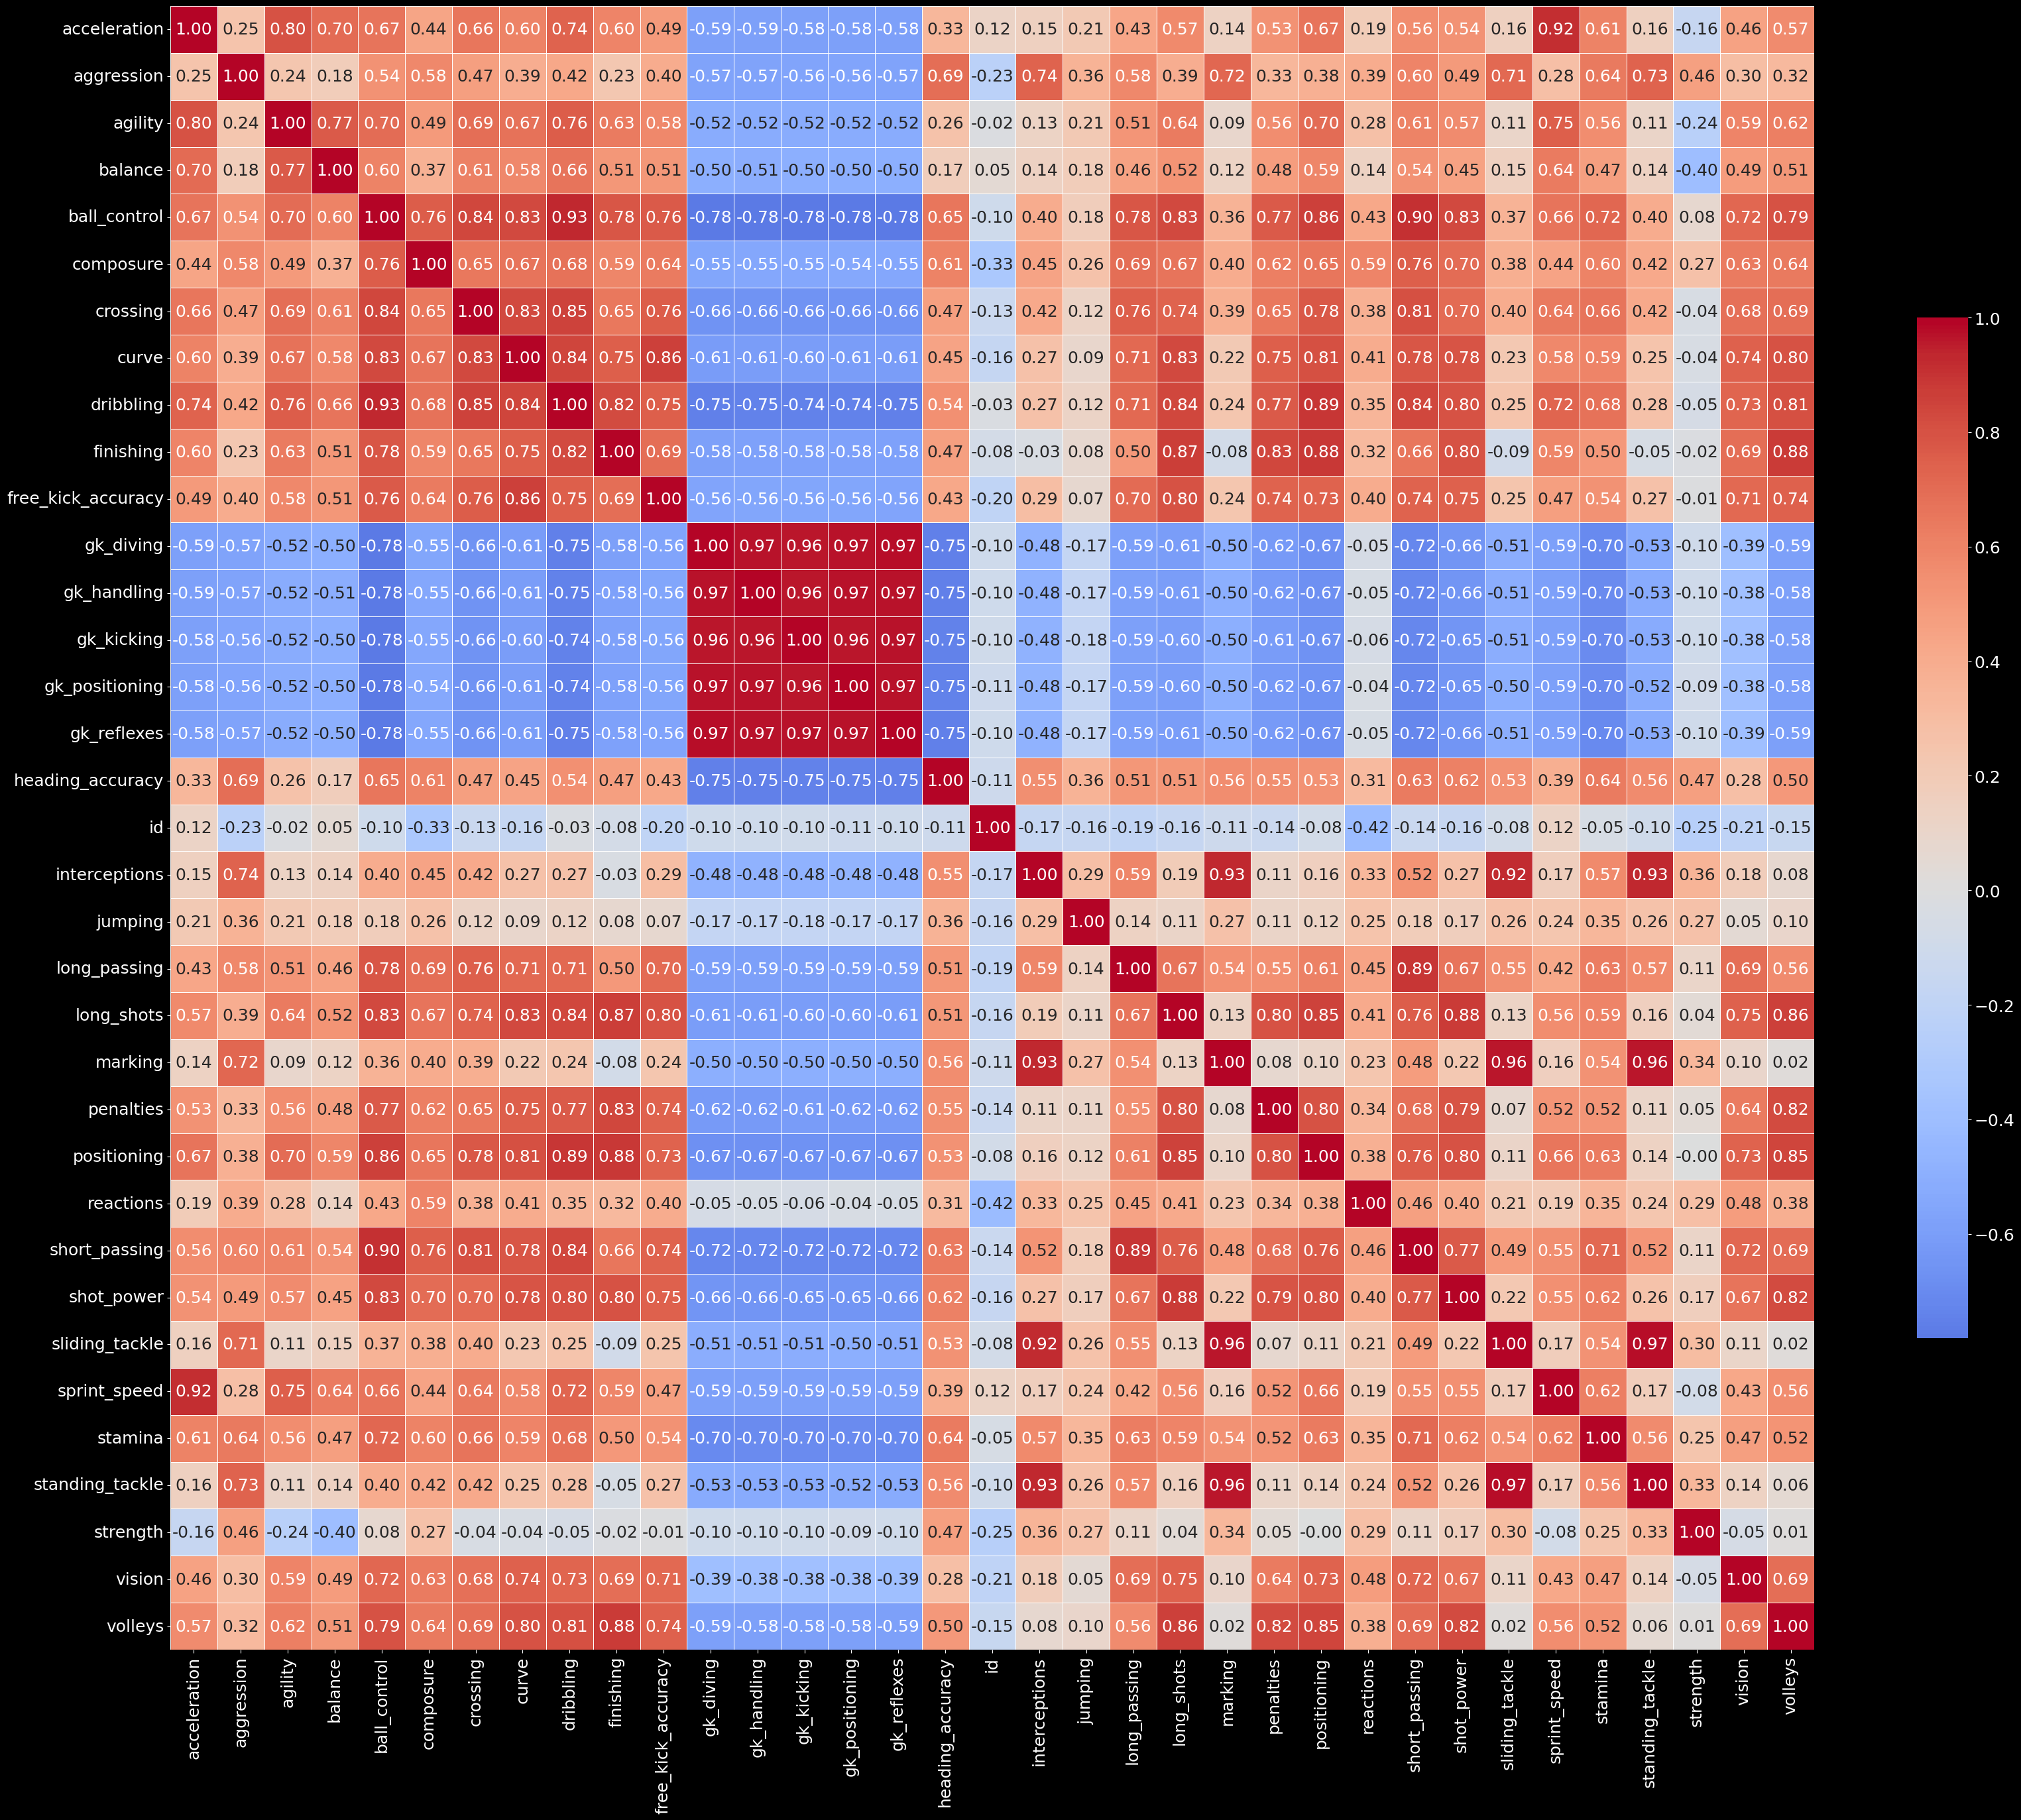

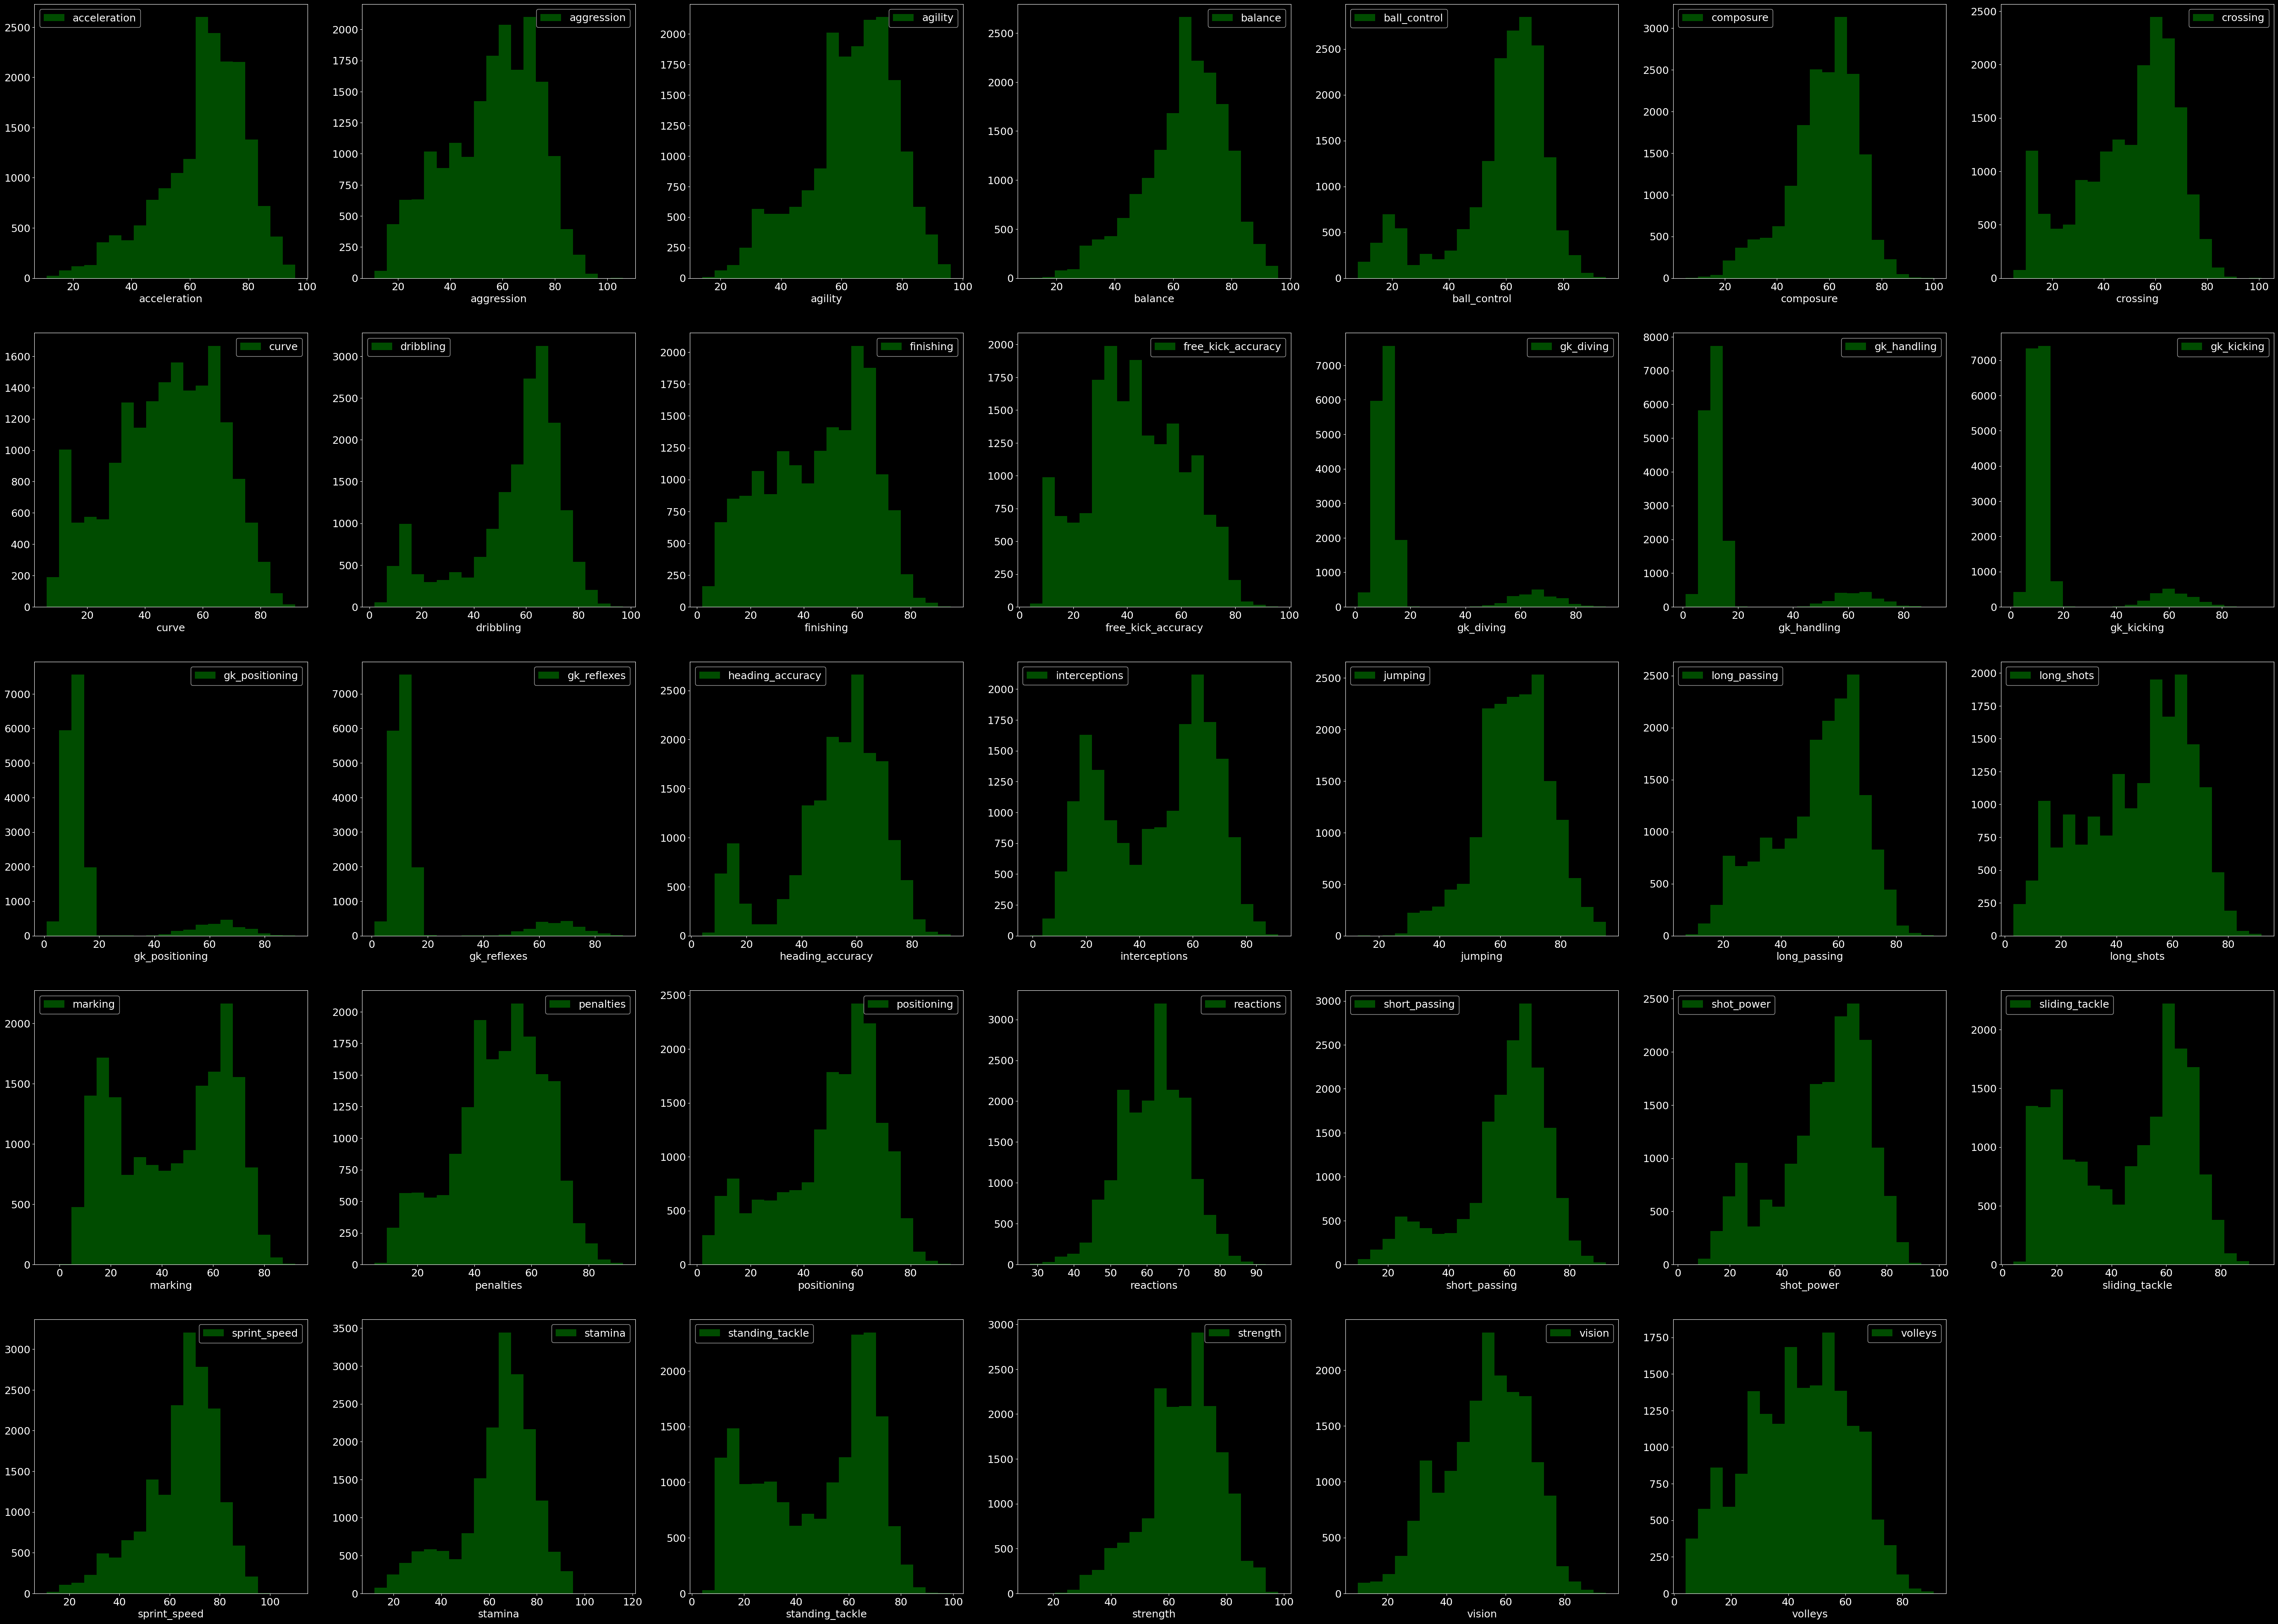

In [18]:
plot_distrib(data, ncols=7, nrows=5, figsize=(70, 50)) # calling the function we defined at the beginning of this notebook

### **Visualization of the data:** Boxplot

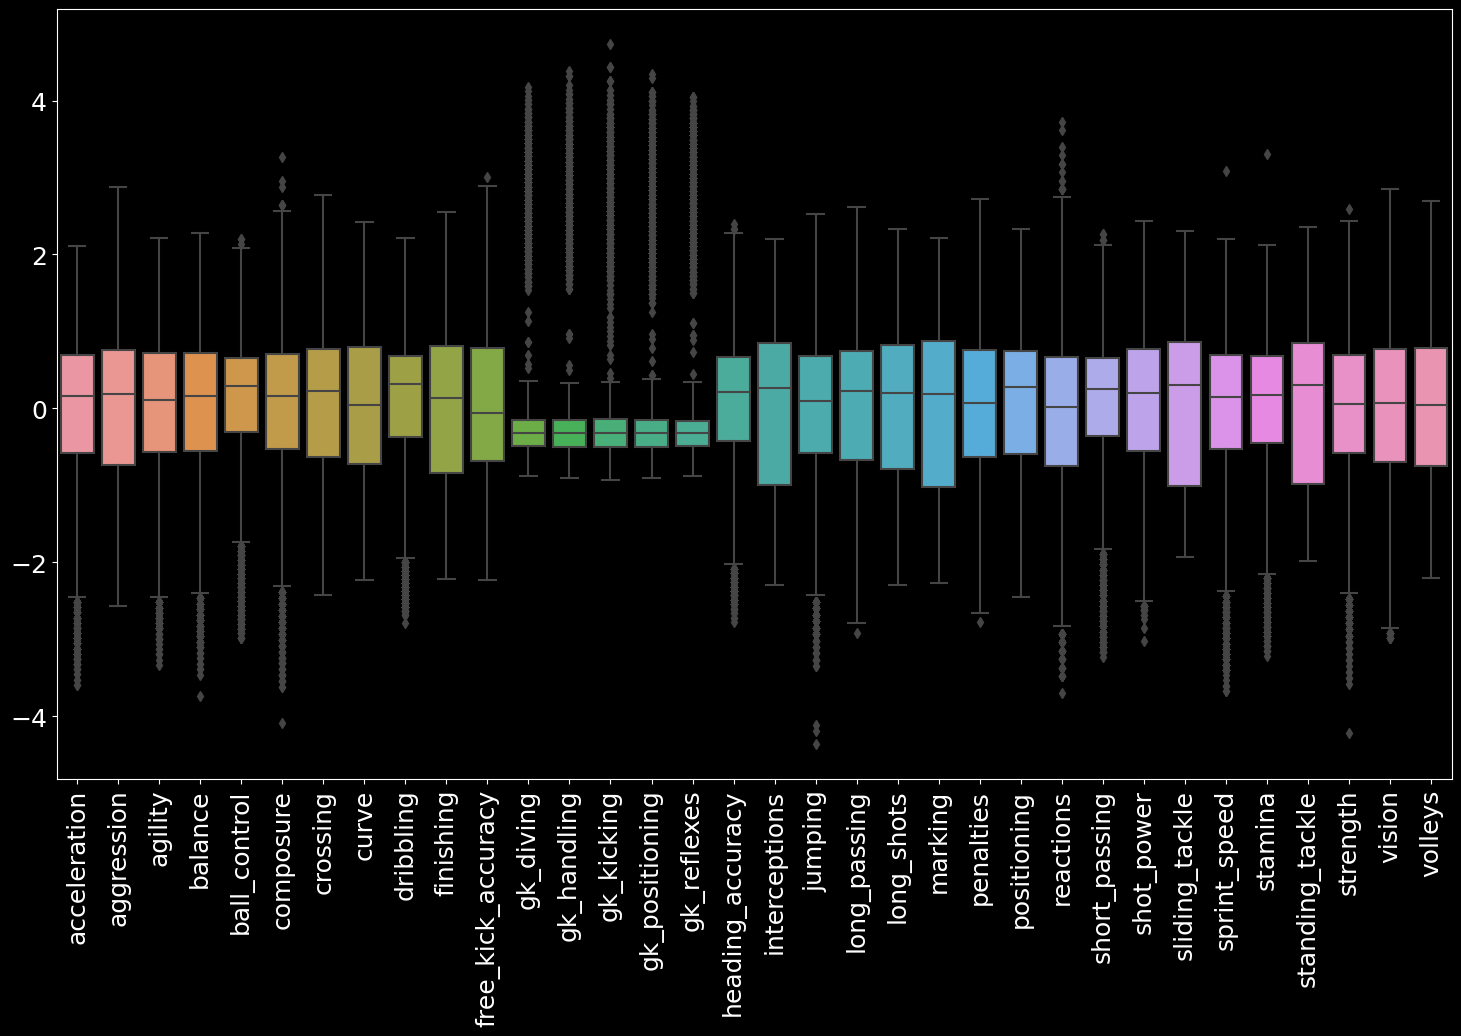

In [19]:
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
ax = sns.boxplot(data=data_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

<div style="background:#EEEDF5;"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    <li>From the above visual methods, we can clearly identify obvious cluster consisting of Goalkeepers. But any further clustering seems difficult.</li>
</div>

--------------

<a style="color:#00BAE5" href='#P0'><div style="text-align:right;"> Back to Table of Contents </div></a>
<a id='P4'></a>
<h2 style="color:#EF475B">  Application of Clustering Techniques</h2>

### **Clustering:** K-Means

In [20]:
r_seed = 23  # random seed to use during modeling for reproducability purposes

In [21]:
cluster_errors = []
for i in range(1, 15):
    n_clusters = i
    kmeans_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0, n_jobs=1),
            ),
        ]
    )
    kmeans_pipeline.fit(data)
    kmeans_pipeline.predict(data)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        selection of the <b>optimal</b> number of clusters)
    </div>
</div>

### **Finding the optimal number of clusters:** Elbow Method

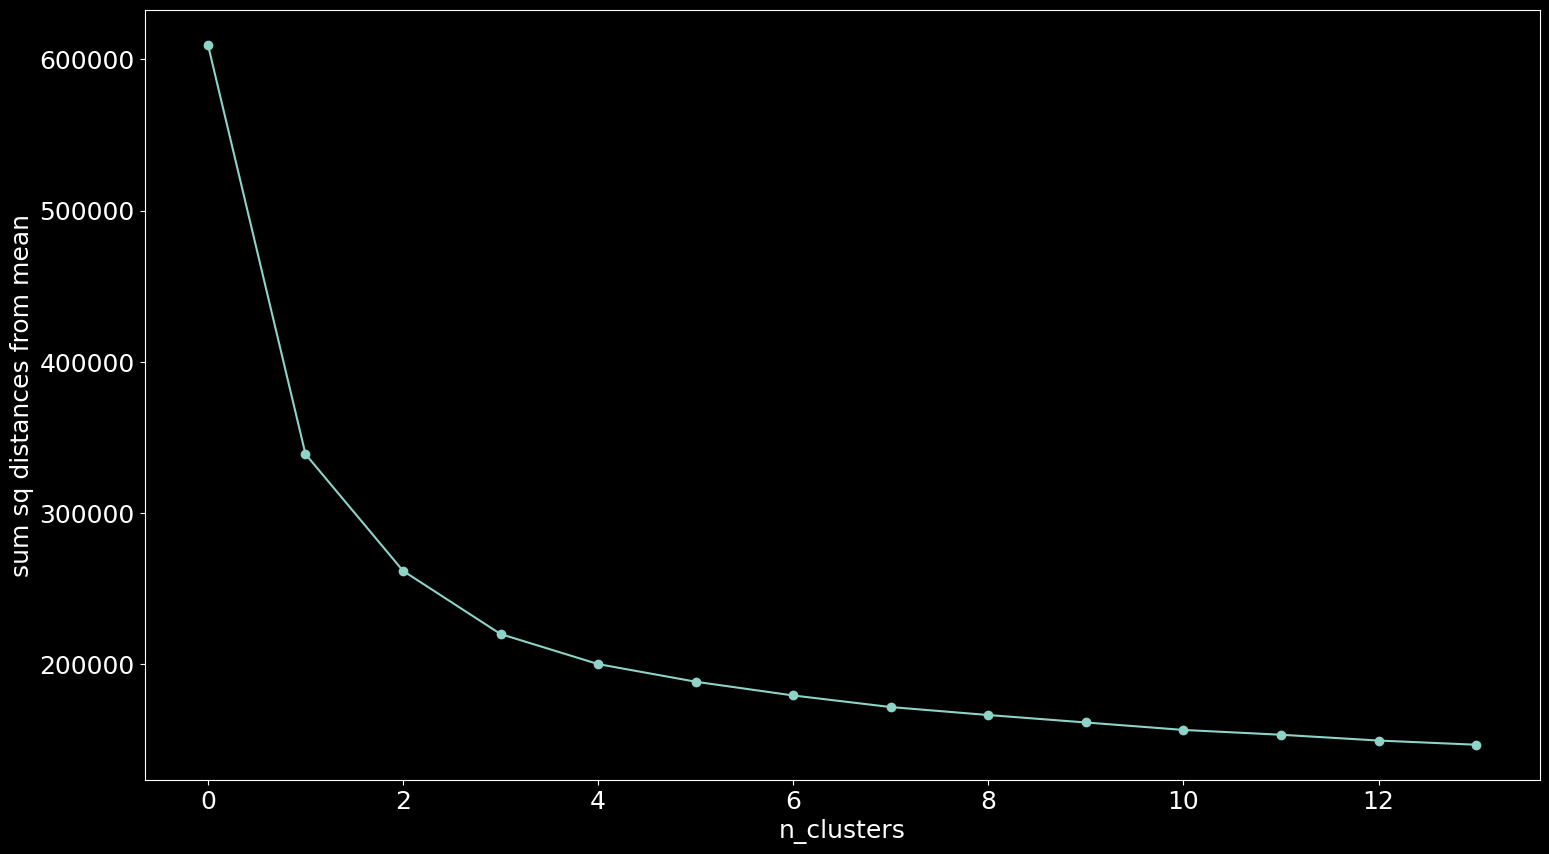

In [22]:
# Quick and Dirty plot:

plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

<div style="background:#EEEDF5;"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    <li>Visually, we could say that maybe 5 clusters is a good choice.</li>
</div>

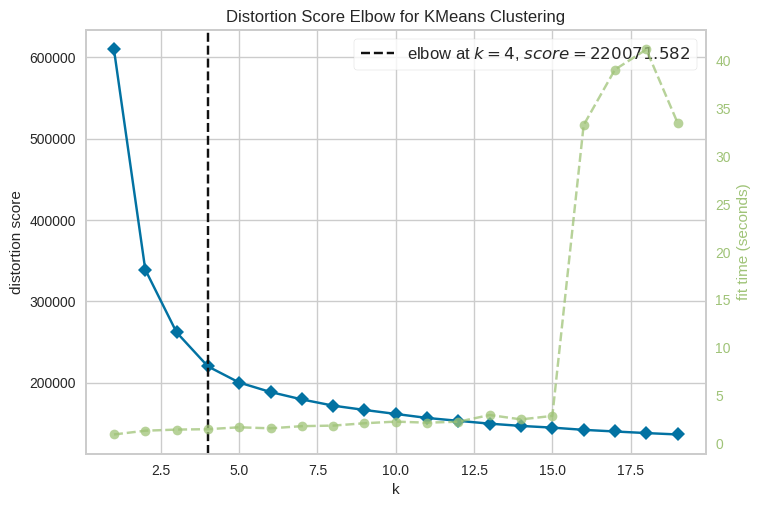

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# More fancy and viasually way to do the elbow method approach:

# Libraries and modules Installation:
# pip install yellowbrick

# Libraries:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# List with Features:
features = list(data.columns)

# Setting up the content of variable 'X':
X = data.loc[:,features].values

numeric_transformer = Pipeline(steps=[('onehot', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])
numeric_features = list(range(len(features)))

feature_encoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

X = feature_encoder.fit_transform(X)

# Clustering model and visualizer:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X) # Fit the data to the visualizer
visualizer.poof() # Draw/show/poof the data

<div style="background:#EEEDF5;"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    <li>With this extensive approach, it seems that 4 is a better number of clusters.</li>
</div>

### **Finding the optimal number of clusters:** Silhouette Method

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        The code cell below was taken from sklearn documentation example of silhouette plotting: <a style="color:#00BAE5" href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html"> link</a>. By the way, a pipeline was included, which is cannot be found in the documentation link provided.
    </div>
</div>

For n_clusters = 2 The average silhouette_score is : 0.5658854
For n_clusters = 3 The average silhouette_score is : 0.28769353
For n_clusters = 4 The average silhouette_score is : 0.2907341
For n_clusters = 5 The average silhouette_score is : 0.2594926
For n_clusters = 6 The average silhouette_score is : 0.22310278




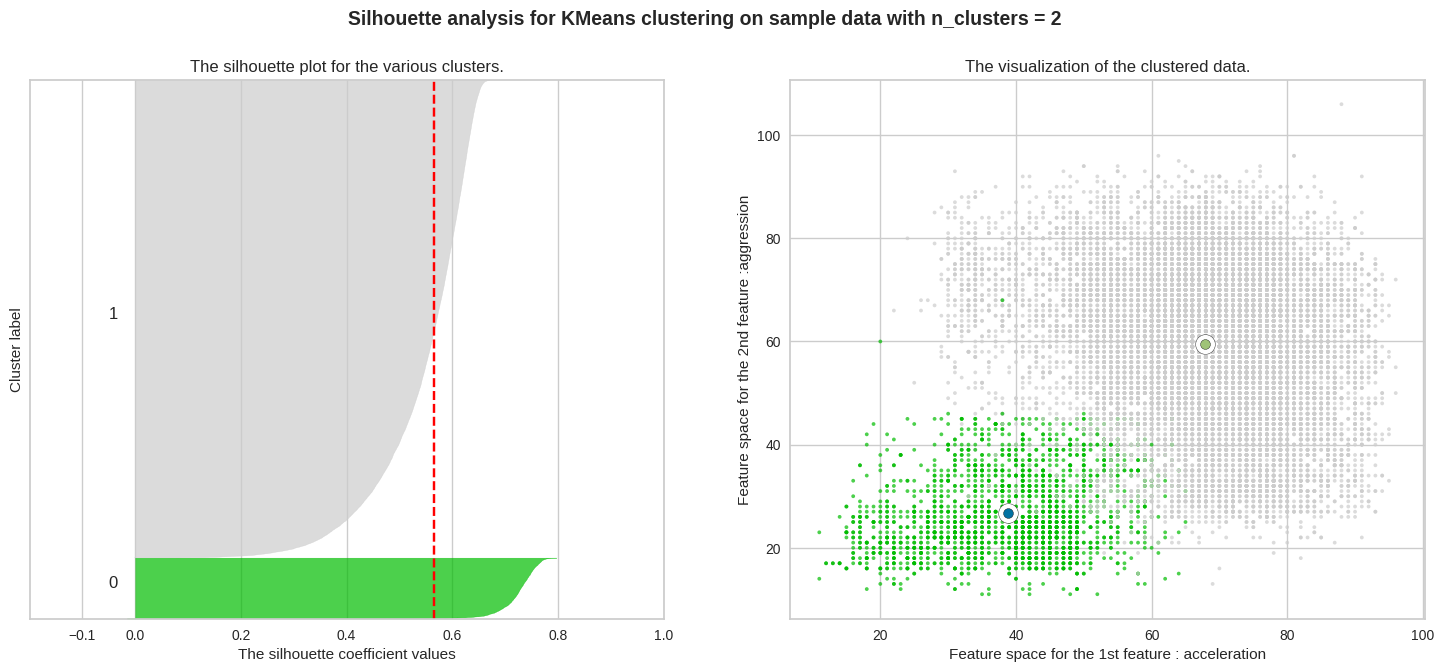

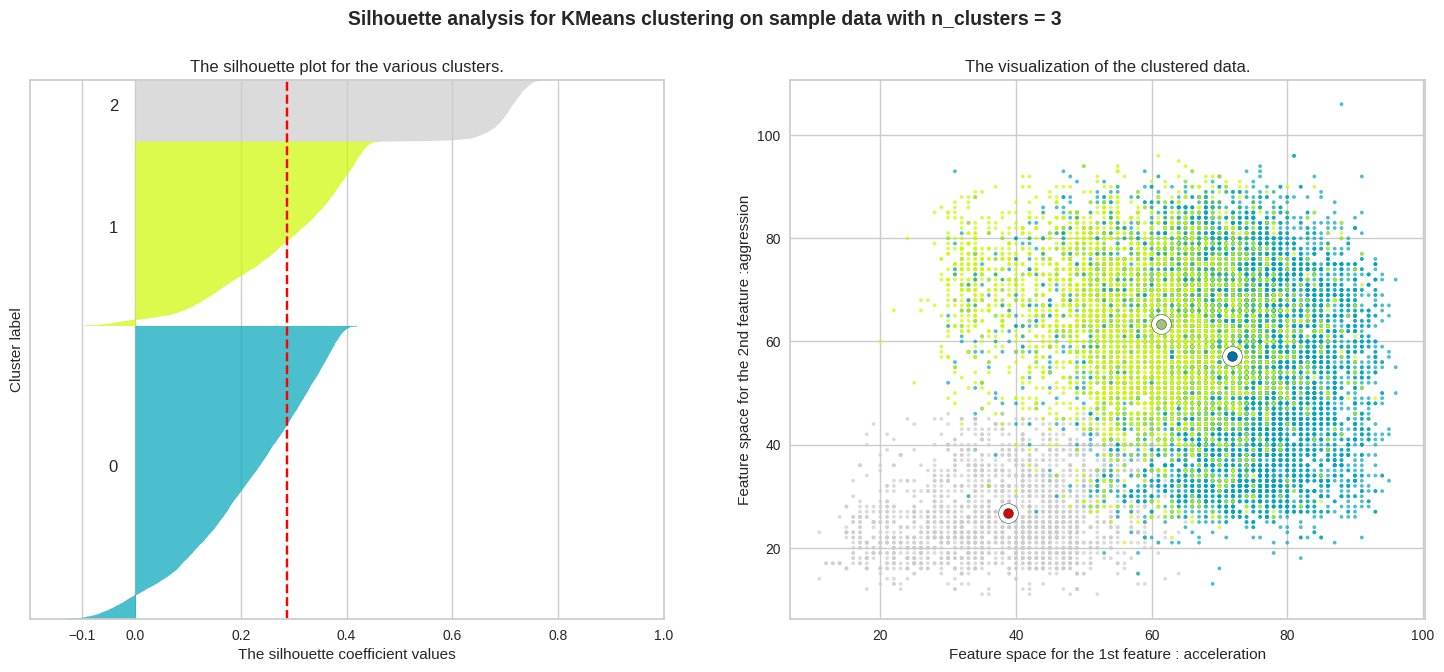

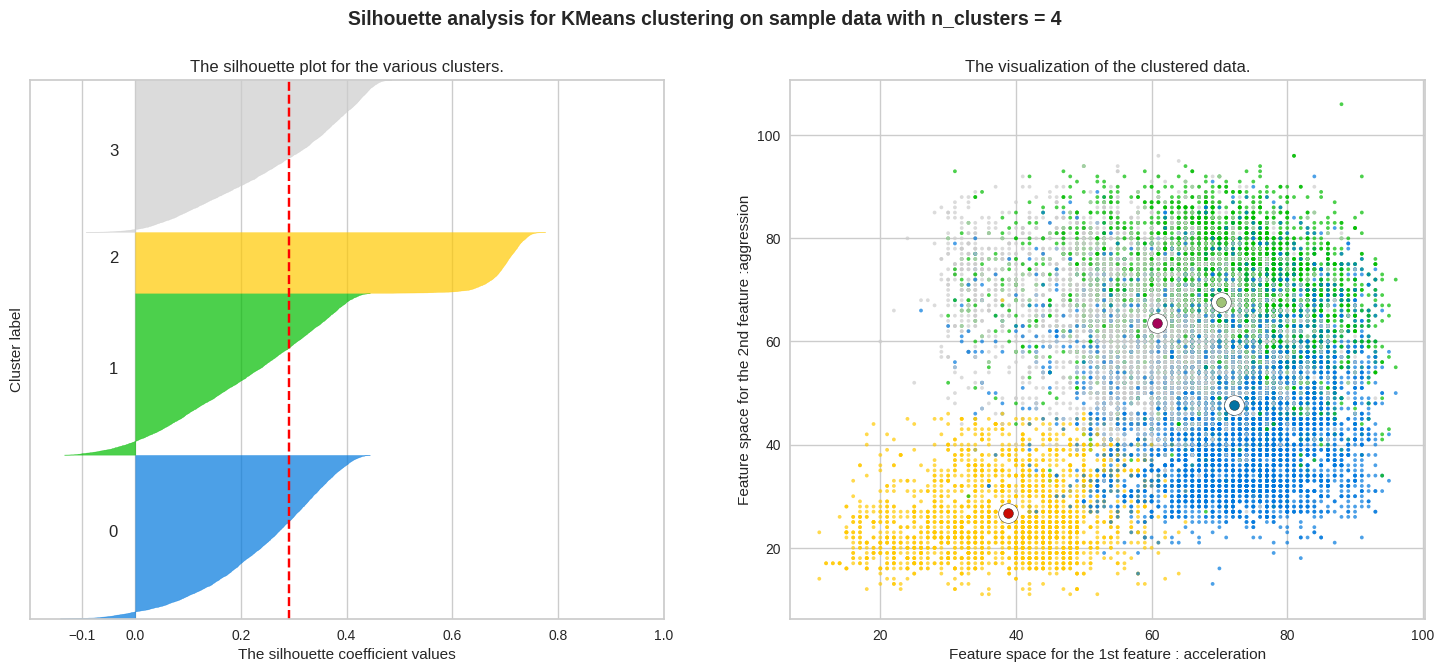

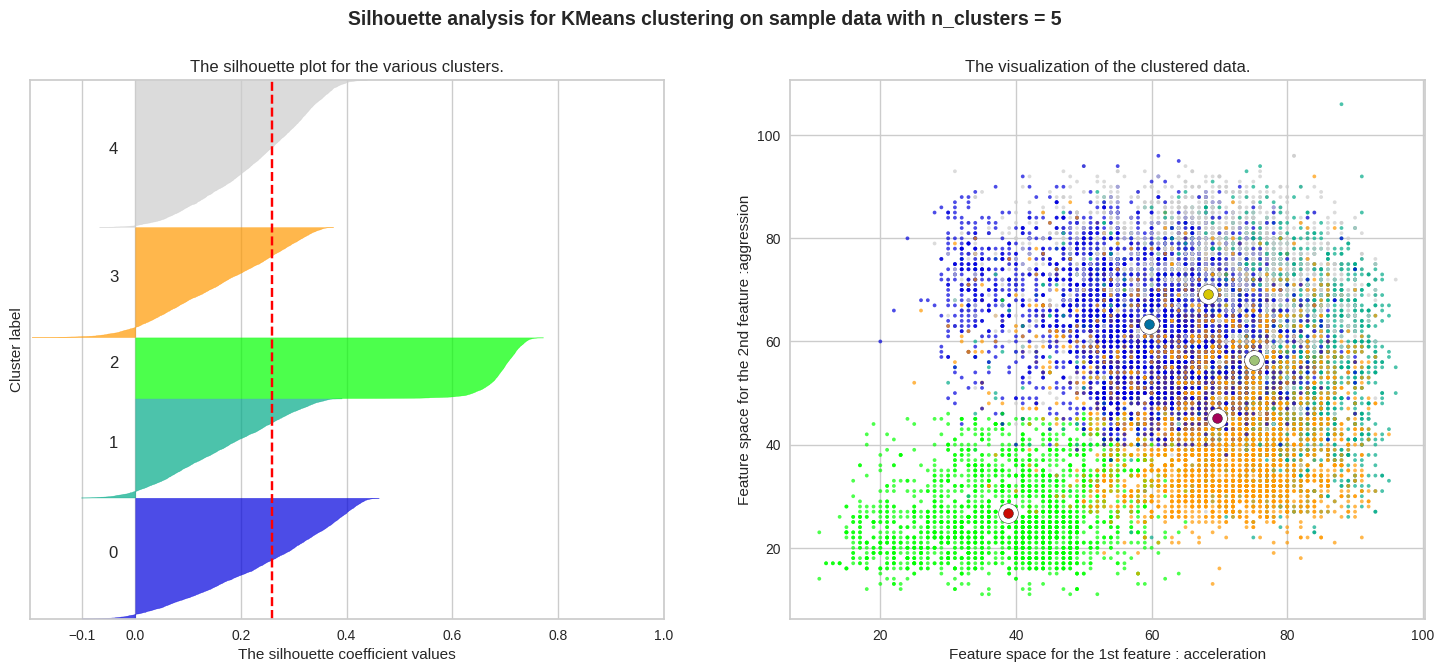

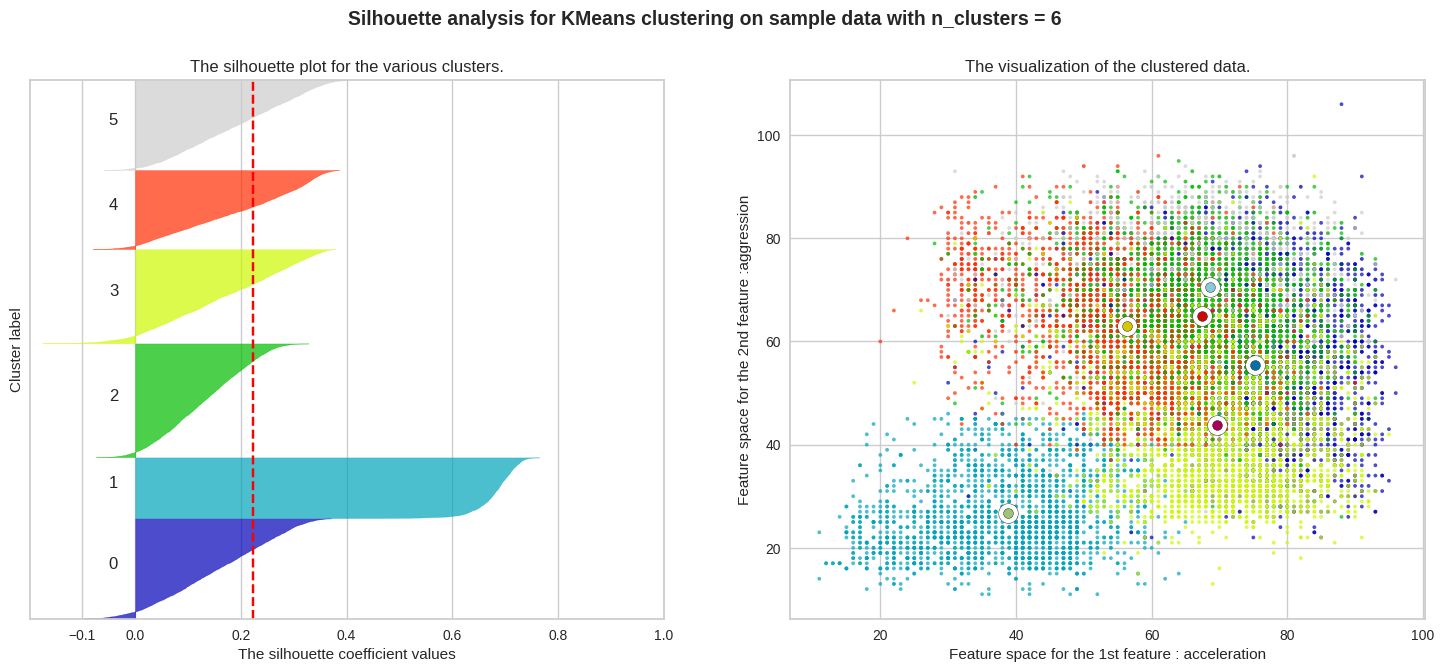

In [24]:
range_n_clusters = range(2, 7)
X = data.copy()
X = X.values.astype("float32")
cols = data.columns

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0, n_jobs=1),
            ),
        ]
    )
    cluster_labels = kmeans_pipeline.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k",
    )

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()

<div style="background:#EEEDF5;"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    <li>The <b>Silhouette Coefficient</b> is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). In other words, the higher the Silhouette score, the better the clusters are defined.</li>
    <li>By analysing both Elbow and Silhouette Methods we can see that best choice is 2 clusters as expected. But as we need something more we would go for the next best which will be <b>4 clusters.</b></li>
    <li>Try to make sense of the clusters formed using the current feature space.</li>
</div>

In [25]:
n_clusters = 4
kmeans_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0)),
    ]
)
kmeans_pipeline.fit(data)
labels = kmeans_pipeline.predict(data)
centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_

cols = ["ball_control", "interceptions", "strength"]
# kmeans_pipeline.fit(data[cols])
data_kmeans = data[cols].copy()
data_kmeans["k-means4"] = labels
data_kmeans["k-means4clusters"] = data_kmeans["k-means4"].map(
    lambda i: "cluster " + str(i)
)

cols = ["ball_control", "interceptions", "strength", "k-means4clusters"]
g1 = sns.pairplot(data_kmeans, hue="k-means4clusters")
g1.fig.figsize = (18, 18)

### **Finding the optimal number of clusters:** Scatter plot with our 4 clusters selected

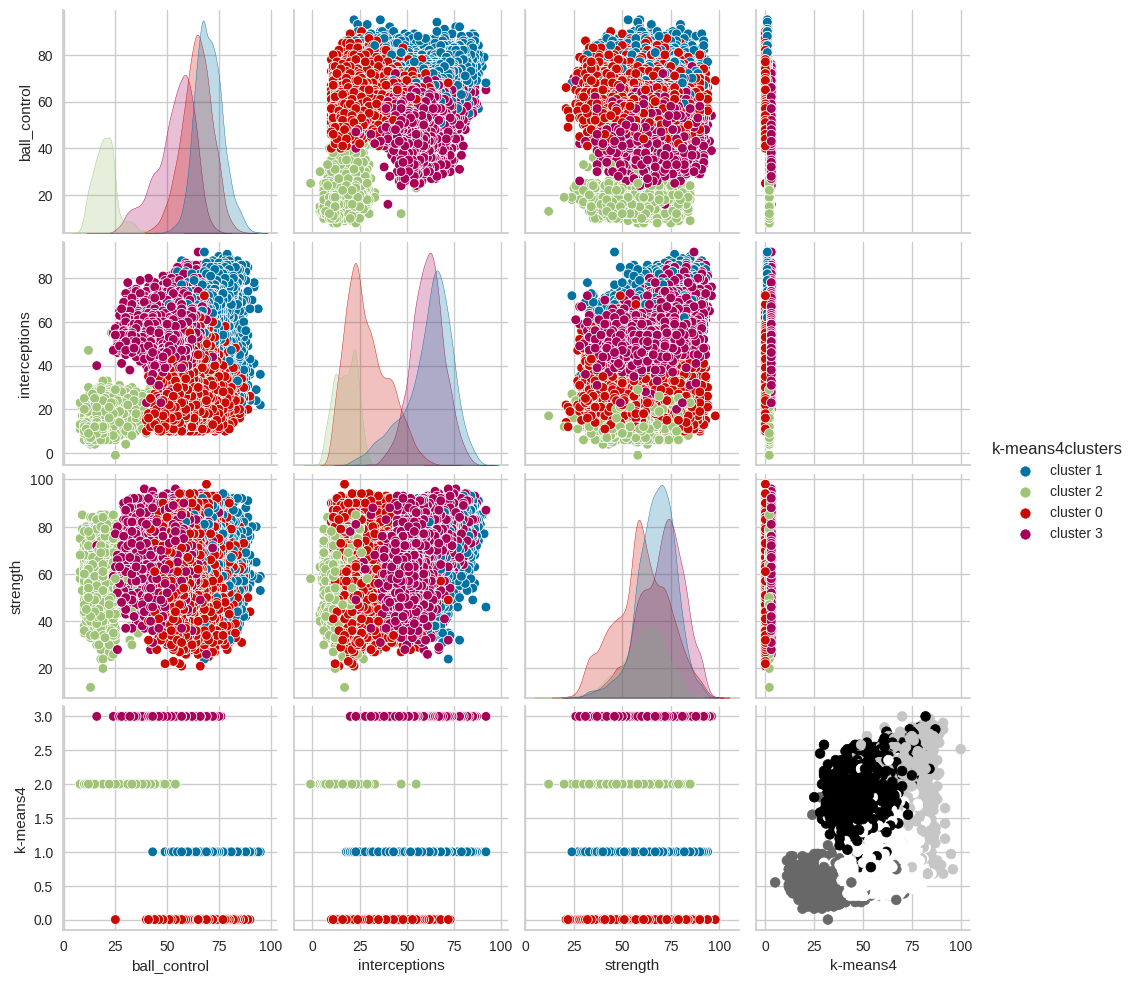

In [26]:
data["k-means4"] = labels
plt.style.use("fivethirtyeight")
a = plt.scatter(data["composure"], data["interceptions"], c=data["k-means4"])
plt.show()

In [27]:
data.iloc[:, 10:19].tail()

free_kick_accuracy  gk_diving  gk_handling  gk_kicking  gk_positioning  \
17976                  12         46           47          49              42   
17977                  11         39           50          39              50   
17978                  25         11           15          12              12   
17979                  34         10           13           7               8   
17980                  17         15            8          10              10   

       gk_reflexes  heading_accuracy  interceptions  jumping  
17976           48                10              9       31  
17977           37                12             16       51  
17978           11                47             16       73  
17979            9                40             46       56  
17980            7                48             38       60

In [28]:
attr.iloc[:, 10:20].tail()

free_kick_accuracy  gk_diving  gk_handling  gk_kicking  gk_positioning  \
17976                  12         46           47          49              42   
17977                  11         39           50          39              50   
17978                  25         11           15          12              12   
17979                  34         10           13           7               8   
17980                  17         15            8          10              10   

       gk_reflexes  heading_accuracy      id  interceptions  jumping  
17976           48                10  237463              9       31  
17977           37                12   11728             16       51  
17978           11                47  231381             16       73  
17979            9                40  238813             46       56  
17980            7                48  238308             38       60

In [29]:
data["ID"] = attr["id"]
data.head()

acceleration  aggression  agility  balance  ball_control  composure  \
0            89          63       89       63            93         95   
1            92          48       90       95            95         96   
2            94          56       96       82            95         92   
3            88          78       86       60            91         83   
4            58          29       52       35            48         70   

   crossing  curve  dribbling  finishing  ...  shot_power  sliding_tackle  \
0        85     81         91         94  ...          94              23   
1        77     89         97         95  ...          85              26   
2        75     81         96         89  ...          80              33   
3        77     86         86         94  ...          87              38   
4        15     14         30         13  ...          25              11   

   sprint_speed  stamina  standing_tackle  strength  vision  volleys  \
0            91       92               31        80      85       88   
1            87       73               28        59      90       85   
2            90       78               24        53      80       83   
3            77       89               45        80      84       88   
4            61       44               10        83      70       11   

   k-means4      ID  
0         1   20801  
1         1  158023  
2         1  190871  
3         1  176580  
4         2  167495  

[5 rows x 36 columns]

In [30]:

data["ID"].dtypes

dtype('int64')

### **Clustering:** Adding the playing possitions data to our clusters

In [31]:
# Data Loading:

url_2 = "../../data/fifa-18-demo-player-dataset/PlayerPlayingPositionData.csv"
data_pos = pd.read_csv(url_2, dtype=str, index_col=0)  

In [32]:
data_pos.head()

CAM    CB   CDM    CF    CM      ID   LAM    LB   LCB   LCM  ...    RB  \
0  89.0  53.0  62.0  91.0  82.0   20801  89.0  61.0  53.0  82.0  ...  61.0   
1  92.0  45.0  59.0  92.0  84.0  158023  92.0  57.0  45.0  84.0  ...  57.0   
2  88.0  46.0  59.0  88.0  79.0  190871  88.0  59.0  46.0  79.0  ...  59.0   
3  87.0  58.0  65.0  88.0  80.0  176580  87.0  64.0  58.0  80.0  ...  64.0   
4   NaN   NaN   NaN   NaN   NaN  167495   NaN   NaN   NaN   NaN  ...   NaN   

    RCB   RCM   RDM    RF    RM    RS    RW   RWB    ST  
0  53.0  82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0  
1  45.0  84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0  
2  46.0  79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0  
3  58.0  80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 28 columns]

In [33]:
print('\nAttributes df columns:\n', data.columns)
print('\nPositions df columns:\n', data_pos.columns)
print('\nAttributes df data types:\n', data.dtypes.unique())
print('\nPositions df data types:\n', data_pos.dtypes.unique())


Attributes df columns:
 Index(['acceleration', 'aggression', 'agility', 'balance', 'ball_control',
       'composure', 'crossing', 'curve', 'dribbling', 'finishing',
       'free_kick_accuracy', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'heading_accuracy', 'interceptions',
       'jumping', 'long_passing', 'long_shots', 'marking', 'penalties',
       'positioning', 'reactions', 'short_passing', 'shot_power',
       'sliding_tackle', 'sprint_speed', 'stamina', 'standing_tackle',
       'strength', 'vision', 'volleys', 'k-means4', 'ID'],
      dtype='object')

Positions df columns:
 Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions', 'RAM', 'RB',
       'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

Attributes df data types:
 [dtype('int64') dtype('int32')]

Positions df data types:
 [dtype('O')]


In [34]:
data_pos.dtypes.unique()

array([dtype('O')], dtype=object)

In [35]:
data["ID"] = data["ID"].astype(str)
merged = pd.merge(data, data_pos, how="inner", on="ID")

In [36]:
merged["Preferred Positions"].value_counts()

CB               2216
GK               2029
ST               1847
CM                759
LB                746
                 ... 
LM ST RM CF         1
ST CAM CM LM        1
LM ST RM CAM        1
ST CAM LM RW        1
CB LW LWB LB        1
Name: Preferred Positions, Length: 802, dtype: int64

<div style="background:#EEEDF5;"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    <li>We can see that most players have multiple preferred position. For simplicity, we will only keep the first position for each player.</li>
</div>

In [37]:
merged["Preferred Positions"] = merged["Preferred Positions"].apply(
    lambda x: x.split(" ")[0]
)

In [38]:
merged.head()

acceleration  aggression  agility  balance  ball_control  composure  \
0            89          63       89       63            93         95   
1            92          48       90       95            95         96   
2            94          56       96       82            95         92   
3            88          78       86       60            91         83   
4            58          29       52       35            48         70   

   crossing  curve  dribbling  finishing  ...    RB   RCB   RCM   RDM    RF  \
0        85     81         91         94  ...  61.0  53.0  82.0  62.0  91.0   
1        77     89         97         95  ...  57.0  45.0  84.0  59.0  92.0   
2        75     81         96         89  ...  59.0  46.0  79.0  59.0  88.0   
3        77     86         86         94  ...  64.0  58.0  80.0  65.0  88.0   
4        15     14         30         13  ...   NaN   NaN   NaN   NaN   NaN   

     RM    RS    RW   RWB    ST  
0  89.0  92.0  91.0  66.0  92.0  
1  90.0  88.0  91.0  62.0  88.0  
2  87.0  84.0  89.0  64.0  84.0  
3  85.0  88.0  87.0  68.0  88.0  
4   NaN   NaN   NaN   NaN   NaN  

[5 rows x 63 columns]

In [39]:
merged["Preferred Positions"].value_counts()

CB     2705
ST     2277
GK     2029
CM     1977
CDM    1396
RM     1350
LM     1326
LB     1309
RB     1195
CAM    1125
RW      429
LW      427
CF      205
LWB     120
RWB     111
Name: Preferred Positions, dtype: int64

### **Clustering:** Heatmap sorted based on kmeans cluster label

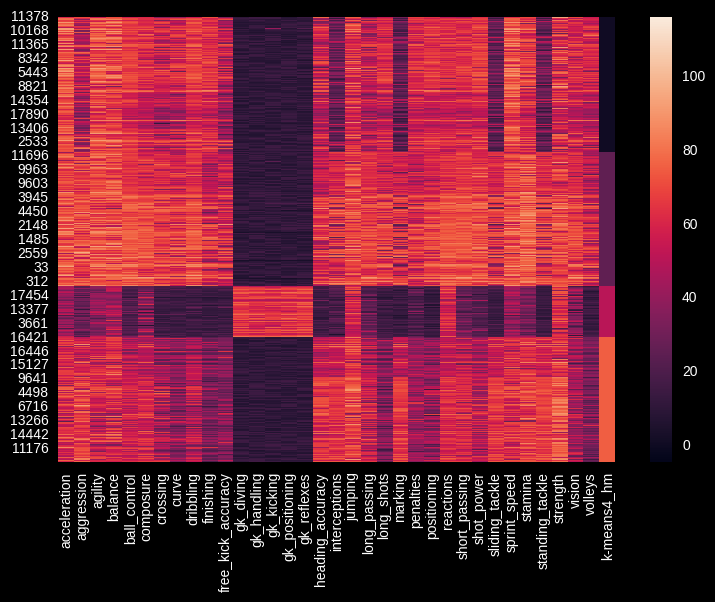

In [40]:
plt.style.use("dark_background")
data_copy = data.copy()
data_copy["k-means4_hm"] = data_copy["k-means4"] * 25
sns.heatmap(data_copy.sort_values(by="k-means4").drop(columns=["k-means4", "ID"]))
plt.show();

<div style="background:#EEEDF5;"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    <li>Use Player Preferred position to understand what type of players are in each cluster</li>
</div>

In [41]:
c_tab = pd.crosstab(merged["k-means4"], merged["Preferred Positions"])
c_tab

Preferred Positions  CAM    CB  CDM   CF    CM    GK   LB   LM   LW  LWB   RB  \
k-means4                                                                        
0                    637     2   58  153   415     0   30  716  324    9   34   
1                    449   349  845   52  1103     0  587  488   97   72  460   
2                      0     0    0    0     0  2029    0    0    0    0    0   
3                     39  2354  493    0   459     0  692  122    6   39  701   

Preferred Positions   RM   RW  RWB    ST  
k-means4                                  
0                    759  333    9  1978  
1                    506   88   53   279  
2                      0    0    0     0  
3                     85    8   49    20

--------------

<a style="color:#00BAE5" href='#P0'><div style="text-align:right;"> Back to Table of Contents </div></a>
<a id='P5'></a>
<h2 style="color:#EF475B">  Sankey Diagram</h2>

A Sankey diagram is a visualization tool used to depict a flow from one set of values to another. In our case, we want to show how our player's preferred position groups them into our clusters.

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        Interactive Sankey diagram may not be able to render in jupyterLab try with Jupyter Notebook or add extensions for Lab.
    </div>
</div>

In [42]:
merged.columns

Index(['acceleration', 'aggression', 'agility', 'balance', 'ball_control',
       'composure', 'crossing', 'curve', 'dribbling', 'finishing',
       'free_kick_accuracy', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'heading_accuracy', 'interceptions',
       'jumping', 'long_passing', 'long_shots', 'marking', 'penalties',
       'positioning', 'reactions', 'short_passing', 'shot_power',
       'sliding_tackle', 'sprint_speed', 'stamina', 'standing_tackle',
       'strength', 'vision', 'volleys', 'k-means4', 'ID', 'CAM', 'CB', 'CDM',
       'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW',
       'LWB', 'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [43]:
sankey_df = merged[["Preferred Positions", "k-means4", "acceleration"]].copy()
sankey_df.head()

Preferred Positions  k-means4  acceleration
0                  ST         1            89
1                  RW         1            92
2                  LW         1            94
3                  ST         1            88
4                  GK         2            58

In [44]:
sankey_df = sankey_df.groupby(["Preferred Positions", "k-means4"]).count().reset_index()
sankey_df.head()

Preferred Positions  k-means4  acceleration
0                 CAM         0           637
1                 CAM         1           449
2                 CAM         3            39
3                  CB         0             2
4                  CB         1           349

<div style="background:#EEEDF5;"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    <li>Sankey uses index to plot so we would need to encode the Player Position</li>
</div>

In [45]:
le = LabelEncoder()
sankey_df["Positions index"] = le.fit_transform(sankey_df["Preferred Positions"])

In [46]:
list(le.classes_)

['CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST']

In [47]:
sankey_df["k-means4_index"] = sankey_df["k-means4"] + len(le.classes_)

In [48]:
sankey_df.head()

Preferred Positions  k-means4  acceleration  Positions index  k-means4_index
0                 CAM         0           637                0              15
1                 CAM         1           449                0              16
2                 CAM         3            39                0              18
3                  CB         0             2                1              15
4                  CB         1           349                1              16

In [49]:
label_sankey = list(le.classes_) + ["KMeans0", "KMeans1", "KMeans2", "KMeans3"]

In [50]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=label_sankey,
            ),
            link=dict(
                source=list(sankey_df["Positions index"]),
                target=list(sankey_df["k-means4_index"]),
                value=list(sankey_df["acceleration"]),
            ),
        )
    ]
)

fig.update_layout(title_text="FIFA Cluster Analysis", font_size=15)
fig.write_image("sankey.png");

--------------

<a style="color:#00BAE5" href='#P0'><div style="text-align:right;"> Back to Table of Contents </div></a>
<a id='P6'></a>
<h2 style="color:#EF475B">  Wrap-up</h2>

### 4 clusters seem to describe GK, Defenders, Mid-Fielders and Attackers:

- **0** --> Defenders [CB,RB,LB]
- **1** --> Goal Keepers [GK]
- **2** --> Mid-Fielders  [CDM,CM,LM,RM]
- **3** --> Attackers  [ST,CAM,LW,RW,CF]

https://en.wikipedia.org/wiki/Association_football_positions

### The Goal Keepers cluster seems to be well defined. But there seems to be a bit of an overlap between the other 3 which may have occurred due to us selecting only the first preferred position of a player.